In [27]:
#import the libraries

!pip install talib-binary
!pip install --upgrade pandas_datareader
!pip install --upgrade pandas
!pip install mplfinance
import talib as ta
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as web
import datetime as dt
import mplfinance as mpf

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
data = web.DataReader("AAPL", "yahoo")

In [4]:
data


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-11-27,43.770000,43.334999,43.762501,43.522499,82867200.0,41.385536
2017-11-28,43.717499,42.965000,43.575001,43.267502,105715200.0,41.143051
2017-11-29,43.230000,41.790001,43.157501,42.369999,166665600.0,40.289612
2017-11-30,43.035000,42.110001,42.607498,42.962502,166108800.0,40.853024
2017-12-01,42.917500,42.125000,42.487499,42.762501,159037200.0,40.662842
...,...,...,...,...,...,...
2022-11-17,151.479996,146.149994,146.429993,150.720001,80389400.0,150.720001
2022-11-18,152.699997,149.970001,152.309998,151.289993,74794600.0,151.289993
2022-11-21,150.369995,147.720001,150.160004,148.009995,58724100.0,148.009995


In [5]:
data['SMA_100'] = ta.SMA(data['Close'],100)

In [6]:
data

,High,Low,Open,Close,Volume,Adj Close,SMA_100
Date,,,,,,,
2017-11-27,43.770000,43.334999,43.762501,43.522499,82867200.0,41.385536,NaN
2017-11-28,43.717499,42.965000,43.575001,43.267502,105715200.0,41.143051,NaN
2017-11-29,43.230000,41.790001,43.157501,42.369999,166665600.0,40.289612,NaN
2017-11-30,43.035000,42.110001,42.607498,42.962502,166108800.0,40.853024,NaN
2017-12-01,42.917500,42.125000,42.487499,42.762501,159037200.0,40.662842,NaN
...,...,...,...,...,...,...,...
2022-11-17,151.479996,146.149994,146.429993,150.720001,80389400.0,150.720001,152.466899
2022-11-18,152.699997,149.970001,152.309998,151.289993,74794600.0,151.289993,152.587499
2022-11-21,150.369995,147.720001,150.160004,148.009995,58724100.0,148.009995,152.700399


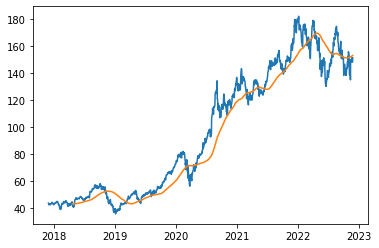

In [7]:
#Plotting the SMA

plt.plot(data['Close'])
plt.plot(data['SMA_100'])

In [9]:
data['EMA_100'] = ta.EMA(data['Close'], 100)

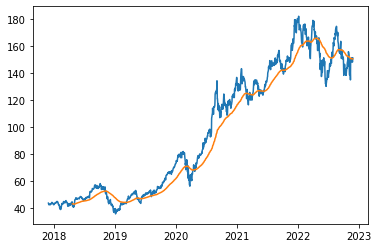

In [10]:
#Plotting the EMA

plt.plot(data['Close'])
plt.plot(data['EMA_100'])

In [14]:
data['RSI'] = ta.RSI(data['Close'])

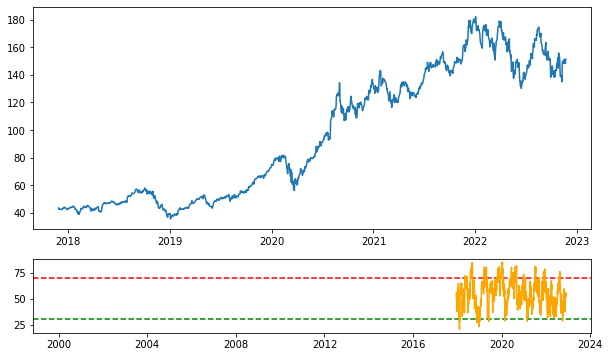

In [15]:
#Plotting the RSI

fig, axs = plt.subplots(2, 1, gridspec_kw={"height_ratios": [3,1]}, figsize=(10, 6))

axs[0].plot(data['Close'])
axs[1].axhline(y=70, color='r', linestyle="--")
axs[1].axhline(y=30, color='g', linestyle="--")
axs[1].plot(data['RSI'], color ='orange')

In [16]:
data['LINEARREG'] = ta.LINEARREG(data['Close'], 200)


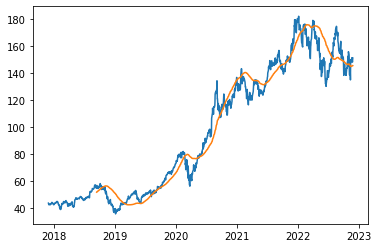

In [17]:
#Linear regression

plt.plot(data['Close'])
plt.plot(data['LINEARREG'])

<BarContainer object of 478 artists>

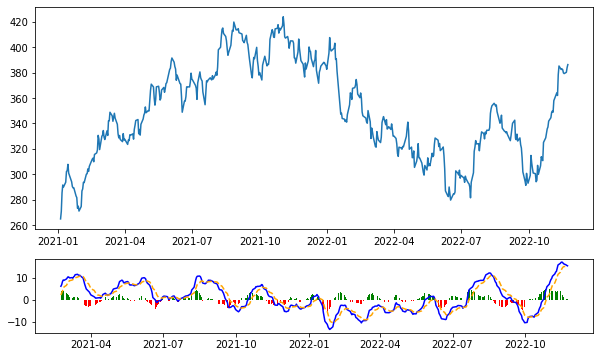

In [21]:
#Plotting the MACD 

start = dt.datetime(2021, 1, 1)
end = dt.datetime.now()

data = web.DataReader("GS", "yahoo", start, end)
macd, macd_signal, macd_hist = ta.MACD(data['Close'])

fig, axs = plt.subplots(2, 1, gridspec_kw={"height_ratios": [3,1]}, figsize=(10, 6))
c = ["red" if cl < 0 else "green" for cl in macd_hist]

axs[0].plot(data['Close'])
axs[1].plot(macd, 'b-')
axs[1].plot(macd_signal, "--", color="orange")
axs[1].bar(macd_hist.index, macd_hist, color=c)


In [24]:
#Pattern recognition: look for the engulfing pattern

start = dt.datetime(2022, 3, 1)
end = dt.datetime.now()

data = web.DataReader("TSLA", "yahoo", start, end)


In [25]:
data['ENGULFING'] = ta.CDLENGULFING(data['Open'], data['High'], data['Low'], data['Close'])

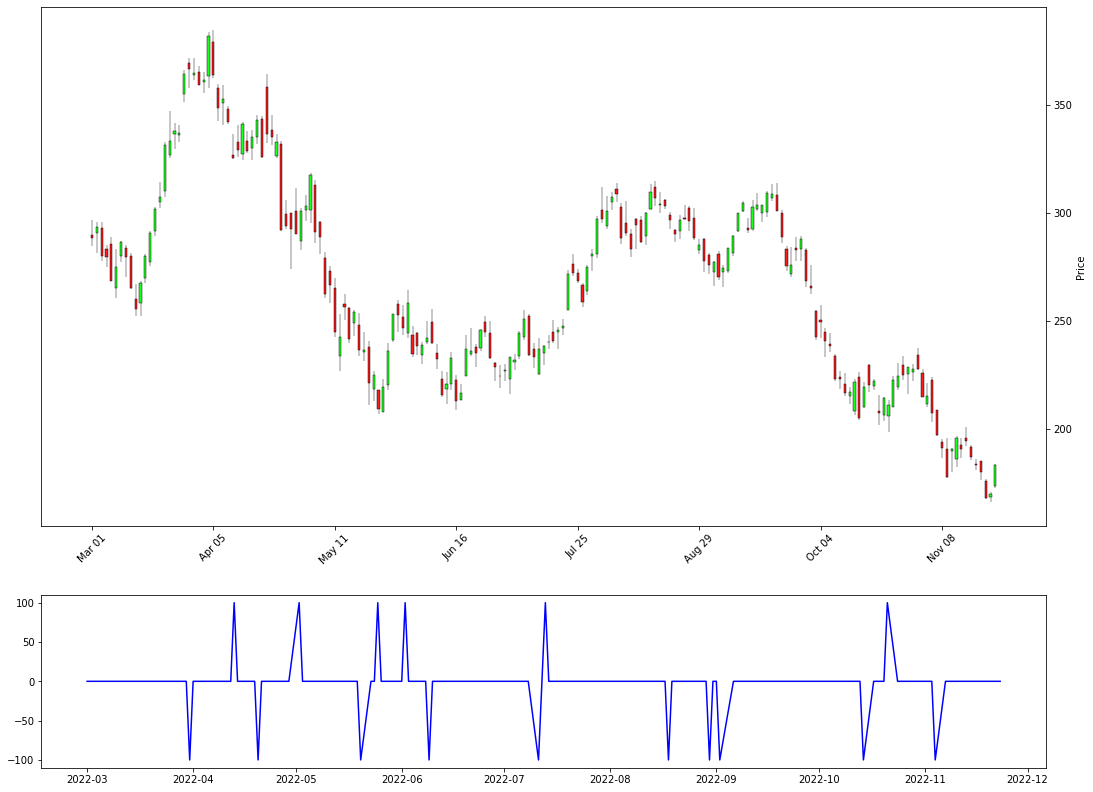

In [35]:
fig, axs = plt.subplots(2, 1, gridspec_kw={"height_ratios": [3,1]}, figsize=(18, 14))

colors = mpf.make_marketcolors(up="#00ff00",
                               down='#ff0000')

mpf_style = mpf.make_mpf_style(base_mpf_style="yahoo", marketcolors = colors)

mpf.plot(data, type='candle', ax=axs[0], style=mpf_style)
axs[1].plot(data['ENGULFING'], color='blue')
